## 3D Nozzle Spray Pattern Analysis Tool Project Submission

3D equation of the cone is as follows: <br>
$x^2 + y ^2 = z^2 \tan^2(\alpha)$, where $\alpha$ is the angle of apex.

Parameterizing the equation, we get: <br>
$x = tr\cos(\theta)$ <br>
$y = tr\sin(\theta)$ <br>
$z = th$ <br>
Here, $t$ and $\theta$ are the parameters, such that $t$ lies in [0,1] and $\theta$ lies in [0, $2\pi$]

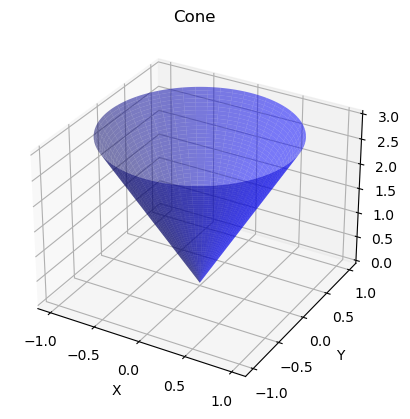

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the cone
r = 1.0  # Radius of the base
h = 3.0  # Height of the cone

# Number of points to generate
num_points = 1000

# Create mesh grid for t and theta
t_values = np.linspace(0, 1, num_points)
theta_values = np.linspace(0, 2*np.pi, num_points)
T, Theta = np.meshgrid(t_values, theta_values)

# Calculate x, y, and z coordinates for each point
X = T * r * np.cos(Theta)
Y = T * r * np.sin(Theta)
Z = T * h

# Plot the cone surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='blue', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cone')
plt.show()


In [34]:
X_noisy = X + np.random.normal(0,2,X.shape)
Y_noisy = X + np.random.normal(0,2,Y.shape)
Z_noisy = X + np.random.normal(0,2,Z.shape)


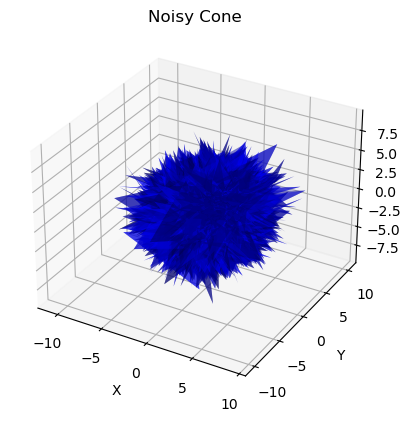

In [35]:
# Plot the noisy cone surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_noisy, Y_noisy, Z_noisy, color='blue', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Noisy Cone')
plt.show()


In [36]:
import numpy as np
from scipy.optimize import minimize

# Observed points with Gaussian noise
observed_points = np.column_stack((X_noisy.flatten(), Y_noisy.flatten(), Z_noisy.flatten()))

def cone_equation(params, points):
    r, h = params
    t_values = points[:, 2] / h
    x = t_values * r * np.cos(points[:, 1])
    y = t_values * r * np.sin(points[:, 1])
    z = points[:, 2]
    return np.sqrt((points[:, 0] - x)**2 + (points[:, 1] - y)**2 + (points[:, 2] - z)**2)

def objective_function(params):
    return np.sum(cone_equation(params, observed_points))

# Initial guess for cone parameters
initial_guess = [1.0, 1.0]

# Minimize the objective function
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

# Extract the optimized cone parameters
best_radius, best_height = result.x

print("Best-fit Cone Parameters:")
print("Radius:", best_radius)
print("Height:", best_height)


Best-fit Cone Parameters:
Radius: 0.01952684552564112
Height: 1.86770822376337
